In [1]:
import torch
from model import LUNet
from matplotlib import pyplot as plt
import numpy as np

from torch.optim.lr_scheduler import StepLR
from train import training_routine_gaussian, training_routine_uniform, training_routine_uniform_method2
from test import testing_routine
from functions import uniform_circle_log_likelihood, uniform_circle_log_likelihood_method2, gaussian_loss_function

from pathlib import Path

from visuals import plot_transformed_grid_and_density, compute_uniform_circle_density, compute_gaussian_density

In [3]:
torch.set_default_dtype(torch.float64)
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
device

device(type='cuda', index=0)

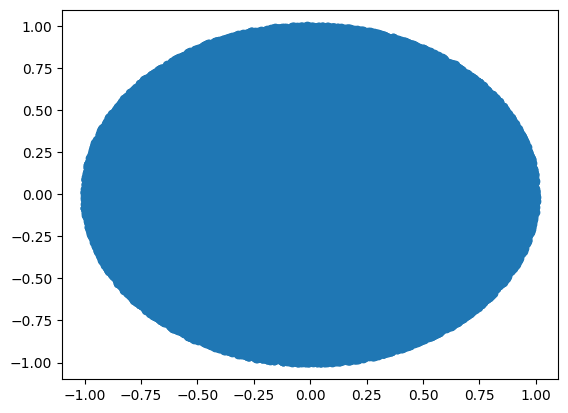

In [4]:
def generate_ellipse(max_num = 10000, scale=(0.5,0.2), device='cpu'):
    data = (torch.rand((max_num,2), device=device)-0.5)*2
    dist = torch.sum(torch.square(data),axis=1)
    data = data[torch.where(dist <= 1)]
    data *= torch.tensor(scale, device=device)
    return data

training_set = generate_ellipse(max_num=100000, scale=(1.,1.), device=device)
validation_set = generate_ellipse(max_num=10000, scale=(1.,1.), device=device)
plt.scatter(np.array(training_set.cpu())[:,0], np.array(training_set.cpu())[:,1])


# Create data loaders for our datasets; shuffle for training, not for validation
train_loader = torch.utils.data.DataLoader(training_set, batch_size=1024, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=128, shuffle=False)
plt.savefig('circle.png')

In [7]:
model_circle = LUNet(num_lu_blocks=8, layer_size = 2).to(device)

In [8]:
optimizer = torch.optim.SGD(model_circle.parameters(), lr=0.8, momentum=0.8)
scheduler = StepLR(optimizer, step_size=1, gamma=0.95)
num_epochs = 50

In [9]:
scheduler.get_last_lr()

[0.8]

In [57]:
%%time

for epoch in range(1, num_epochs + 1):
    training_routine_gaussian(model_circle, train_loader, optimizer)
    testing_routine(model_circle, validation_loader,loss_function=gaussian_loss_function)
    scheduler.step()

77it [00:01, 38.91it/s]
62it [00:00, 177.64it/s]


Test set: Average loss: 98.5906


77it [00:01, 40.91it/s]
62it [00:00, 176.64it/s]


Test set: Average loss: 98.0874


77it [00:01, 41.26it/s]
62it [00:00, 178.15it/s]


Test set: Average loss: 99.1428


77it [00:01, 40.44it/s]
62it [00:00, 178.66it/s]


Test set: Average loss: 99.9021


77it [00:01, 39.69it/s]
62it [00:00, 174.14it/s]


Test set: Average loss: 99.8137


77it [00:01, 41.40it/s]
62it [00:00, 178.15it/s]


Test set: Average loss: 97.3084


77it [00:01, 40.83it/s]
62it [00:00, 179.18it/s]


Test set: Average loss: 98.5401


77it [00:01, 41.89it/s]
62it [00:00, 172.70it/s]


Test set: Average loss: 100.2444


77it [00:01, 41.62it/s]
62it [00:00, 176.62it/s]


Test set: Average loss: 97.9106


77it [00:01, 41.02it/s]
62it [00:00, 175.14it/s]


Test set: Average loss: 99.3529


77it [00:01, 41.62it/s]
62it [00:00, 173.17it/s]


Test set: Average loss: 97.9292


77it [00:01, 40.42it/s]
62it [00:00, 179.69it/s]


Test set: Average loss: 97.2497


77it [00:01, 40.83it/s]
62it [00:00, 177.63it/s]


Test set: Average loss: 97.9113


77it [00:01, 40.59it/s]
62it [00:00, 175.62it/s]


Test set: Average loss: 97.4053


77it [00:01, 40.98it/s]
62it [00:00, 178.66it/s]


Test set: Average loss: 97.4524


77it [00:01, 40.29it/s]
62it [00:00, 178.16it/s]


Test set: Average loss: 96.6820


77it [00:01, 40.87it/s]
62it [00:00, 172.69it/s]


Test set: Average loss: 97.4862


77it [00:01, 40.81it/s]
62it [00:00, 178.15it/s]


Test set: Average loss: 97.0043


77it [00:01, 40.53it/s]
62it [00:00, 175.13it/s]


Test set: Average loss: 96.8179


77it [00:01, 40.89it/s]
62it [00:00, 171.74it/s]


Test set: Average loss: 96.5656


77it [00:01, 40.74it/s]
62it [00:00, 179.71it/s]


Test set: Average loss: 96.8053


77it [00:01, 39.53it/s]
62it [00:00, 178.66it/s]


Test set: Average loss: 97.4068


77it [00:01, 41.45it/s]
62it [00:00, 170.33it/s]


Test set: Average loss: 96.8127


77it [00:01, 40.53it/s]
62it [00:00, 178.66it/s]


Test set: Average loss: 96.9332


77it [00:01, 40.91it/s]
62it [00:00, 178.16it/s]


Test set: Average loss: 97.6636


77it [00:01, 40.83it/s]
62it [00:00, 171.27it/s]


Test set: Average loss: 96.6747


77it [00:01, 40.98it/s]
62it [00:00, 178.68it/s]


Test set: Average loss: 96.6752


77it [00:01, 40.25it/s]
62it [00:00, 175.14it/s]


Test set: Average loss: 96.9724


77it [00:01, 41.02it/s]
62it [00:00, 172.69it/s]


Test set: Average loss: 97.1589


77it [00:01, 41.18it/s]
62it [00:00, 176.12it/s]


Test set: Average loss: 96.5413


77it [00:01, 39.88it/s]
62it [00:00, 175.13it/s]


Test set: Average loss: 96.4582


77it [00:01, 41.49it/s]
62it [00:00, 172.21it/s]


Test set: Average loss: 96.4628


77it [00:01, 41.20it/s]
62it [00:00, 179.18it/s]


Test set: Average loss: 96.5955


77it [00:01, 40.17it/s]
62it [00:00, 177.65it/s]


Test set: Average loss: 96.4140


77it [00:01, 40.72it/s]
62it [00:00, 173.17it/s]


Test set: Average loss: 96.8404


77it [00:01, 39.79it/s]
62it [00:00, 170.78it/s]


Test set: Average loss: 96.5608


77it [00:01, 39.27it/s]
62it [00:00, 176.62it/s]


Test set: Average loss: 96.7862


77it [00:01, 40.42it/s]
62it [00:00, 179.18it/s]


Test set: Average loss: 96.7936


77it [00:01, 40.72it/s]
62it [00:00, 179.17it/s]


Test set: Average loss: 96.6648


77it [00:01, 39.57it/s]
62it [00:00, 178.67it/s]


Test set: Average loss: 96.5198


77it [00:01, 40.34it/s]
62it [00:00, 176.14it/s]


Test set: Average loss: 96.4351


77it [00:01, 40.74it/s]
62it [00:00, 181.80it/s]


Test set: Average loss: 96.3680


77it [00:01, 40.85it/s]
62it [00:00, 179.19it/s]


Test set: Average loss: 96.3603


77it [00:01, 40.25it/s]
62it [00:00, 175.62it/s]


Test set: Average loss: 96.5847


77it [00:01, 40.40it/s]
62it [00:00, 176.62it/s]


Test set: Average loss: 96.5187


77it [00:01, 40.57it/s]
62it [00:00, 174.63it/s]


Test set: Average loss: 96.3944


77it [00:01, 39.81it/s]
62it [00:00, 176.14it/s]


Test set: Average loss: 96.5184


77it [00:01, 40.23it/s]
62it [00:00, 179.71it/s]


Test set: Average loss: 96.3804


77it [00:01, 40.55it/s]
62it [00:00, 176.62it/s]


Test set: Average loss: 97.0318


77it [00:01, 40.53it/s]
62it [00:00, 178.66it/s]

Test set: Average loss: 96.4003
CPU times: total: 3min 56s
Wall time: 1min 52s


0

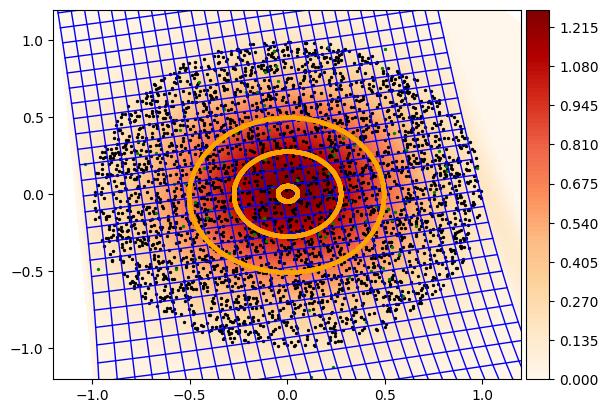

In [17]:
scale = 1.2
factor = 2

sampling_data =  torch.tensor(np.random.normal(size=(100,2), scale=1.))
plot_transformed_grid_and_density(model_circle, training_set.to('cpu'), device, sampling_data, grid_width=30, grid_shape=(1000,3),
                                 x_range=(-factor, factor), y_range=(-1.5*factor, 1.5*factor), x_lim=(-scale, scale), y_lim=(-scale, scale),
                                 density_function=compute_gaussian_density, name='circle_gaussian_31.png')

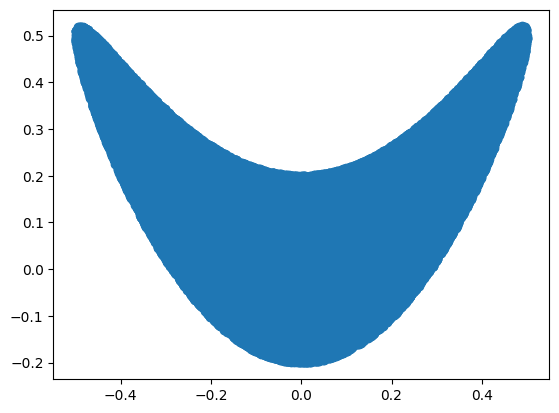

In [60]:
def generate_banana(n=100000, device=device):
    train_loader = generate_ellipse(n, device=device)
    train_loader[:, 1] = train_loader[:,1] + 2*train_loader[:,0]**2
    return train_loader
training_set = generate_banana(n=100000, device=device)
validation_set = generate_banana(n=10000, device=device)
plt.scatter(np.array(training_set.cpu())[:,0], np.array(training_set.cpu())[:,1])

# Create data loaders for our datasets; shuffle for training, not for validation
train_loader = torch.utils.data.DataLoader(training_set, batch_size=1024, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=128, shuffle=False)

In [72]:
model_banana = LUNet(num_lu_blocks=6, layer_size = 2).to(device)

In [121]:
optimizer = torch.optim.SGD(model_banana.parameters(), lr=0.05, momentum=0.8)
scheduler = StepLR(optimizer, step_size=1, gamma=0.95)
num_epochs = 50

In [120]:
scheduler.get_last_lr()

[0.0038472487638356555]

In [122]:
%%time

for epoch in range(1, num_epochs + 1):
    training_routine_gaussian(model_banana, train_loader, optimizer)
    testing_routine(model_banana, validation_loader,loss_function=gaussian_loss_function)
    scheduler.step()

77it [00:01, 46.92it/s]
62it [00:00, 214.53it/s]


Test set: Average loss: -137.6650


77it [00:01, 51.75it/s]
62it [00:00, 219.06it/s]


Test set: Average loss: -169.1098


77it [00:01, 47.18it/s]
62it [00:00, 217.54it/s]


Test set: Average loss: -49.4362


77it [00:01, 48.61it/s]
62it [00:00, 220.64it/s]


Test set: Average loss: -92.6197


77it [00:01, 48.83it/s]
62it [00:00, 217.52it/s]


Test set: Average loss: -172.0035


77it [00:01, 49.26it/s]
62it [00:00, 218.29it/s]


Test set: Average loss: -174.4866


77it [00:01, 48.46it/s]
62it [00:00, 220.62it/s]


Test set: Average loss: -109.4661


77it [00:01, 48.92it/s]
62it [00:00, 224.61it/s]


Test set: Average loss: -130.5920


77it [00:01, 48.46it/s]
62it [00:00, 217.52it/s]


Test set: Average loss: -171.9566


77it [00:01, 48.09it/s]
62it [00:00, 210.86it/s]


Test set: Average loss: -174.5050


77it [00:01, 49.04it/s]
62it [00:00, 220.62it/s]


Test set: Average loss: -135.1935


77it [00:01, 49.30it/s]
62it [00:00, 223.02it/s]


Test set: Average loss: -147.6793


77it [00:01, 48.70it/s]
62it [00:00, 222.20it/s]


Test set: Average loss: -170.5115


77it [00:01, 49.01it/s]
62it [00:00, 223.81it/s]


Test set: Average loss: -174.5301


77it [00:01, 49.14it/s]
62it [00:00, 223.02it/s]


Test set: Average loss: -150.7577


77it [00:01, 48.28it/s]
62it [00:00, 219.83it/s]


Test set: Average loss: -158.2237


77it [00:01, 48.07it/s]
62it [00:00, 219.86it/s]


Test set: Average loss: -172.3601


77it [00:01, 49.04it/s]
62it [00:00, 213.77it/s]


Test set: Average loss: -174.6200


77it [00:01, 48.25it/s]
62it [00:00, 216.01it/s]


Test set: Average loss: -162.9280


77it [00:01, 48.70it/s]
62it [00:00, 223.00it/s]


Test set: Average loss: -168.5811


77it [00:01, 49.45it/s]
62it [00:00, 224.61it/s]


Test set: Average loss: -172.7505


77it [00:01, 46.55it/s]
62it [00:00, 222.22it/s]


Test set: Average loss: -175.0701


77it [00:01, 48.92it/s]
62it [00:00, 222.20it/s]


Test set: Average loss: -169.9928


77it [00:01, 48.64it/s]
62it [00:00, 221.43it/s]


Test set: Average loss: -171.9546


77it [00:01, 48.19it/s]
62it [00:00, 222.20it/s]


Test set: Average loss: -174.2755


77it [00:01, 49.20it/s]
62it [00:00, 220.64it/s]


Test set: Average loss: -174.9879


77it [00:01, 48.77it/s]
62it [00:00, 225.43it/s]


Test set: Average loss: -172.7831


77it [00:01, 48.80it/s]
62it [00:00, 224.61it/s]


Test set: Average loss: -174.7217


77it [00:01, 49.45it/s]
62it [00:00, 223.02it/s]


Test set: Average loss: -174.6190


77it [00:01, 49.97it/s]
62it [00:00, 225.43it/s]


Test set: Average loss: -174.7982


77it [00:01, 50.39it/s]
62it [00:00, 225.43it/s]


Test set: Average loss: -174.7697


77it [00:01, 49.97it/s]
62it [00:00, 220.62it/s]


Test set: Average loss: -175.9232


77it [00:01, 48.58it/s]
62it [00:00, 225.46it/s]


Test set: Average loss: -175.0984


77it [00:01, 48.49it/s]
62it [00:00, 223.80it/s]


Test set: Average loss: -176.2808


77it [00:01, 48.77it/s]
62it [00:00, 227.08it/s]


Test set: Average loss: -175.8854


77it [00:01, 48.31it/s]
62it [00:00, 226.28it/s]


Test set: Average loss: -176.2567


77it [00:01, 48.67it/s]
62it [00:00, 213.77it/s]


Test set: Average loss: -175.7694


77it [00:01, 49.01it/s]
62it [00:00, 227.91it/s]


Test set: Average loss: -176.2817


77it [00:01, 48.46it/s]
62it [00:00, 216.78it/s]


Test set: Average loss: -175.7402


77it [00:01, 46.78it/s]
62it [00:00, 222.22it/s]


Test set: Average loss: -176.9427


77it [00:01, 48.64it/s]
62it [00:00, 222.22it/s]


Test set: Average loss: -176.1485


77it [00:01, 48.55it/s]
62it [00:00, 217.52it/s]


Test set: Average loss: -177.0609


77it [00:01, 47.65it/s]
62it [00:00, 216.76it/s]


Test set: Average loss: -173.1943


77it [00:01, 46.70it/s]
62it [00:00, 203.26it/s]


Test set: Average loss: -175.6806


77it [00:01, 47.09it/s]
62it [00:00, 213.77it/s]


Test set: Average loss: -177.3506


77it [00:01, 46.87it/s]
62it [00:00, 209.46it/s]


Test set: Average loss: -177.1724


77it [00:01, 47.21it/s]
62it [00:00, 216.76it/s]


Test set: Average loss: -175.6239


77it [00:01, 46.98it/s]
62it [00:00, 213.04it/s]


Test set: Average loss: -176.0592


77it [00:01, 47.77it/s]
62it [00:00, 215.25it/s]


Test set: Average loss: -175.7946


77it [00:01, 46.05it/s]
62it [00:00, 213.04it/s]

Test set: Average loss: -177.6839
CPU times: total: 3min 40s
Wall time: 1min 33s


C:\Users\Admin\AppData\Local\Temp\ipykernel_28772\4193416005.py:122: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  output = model(torch.tensor(sampling_data, device=device), reverse=True)


0

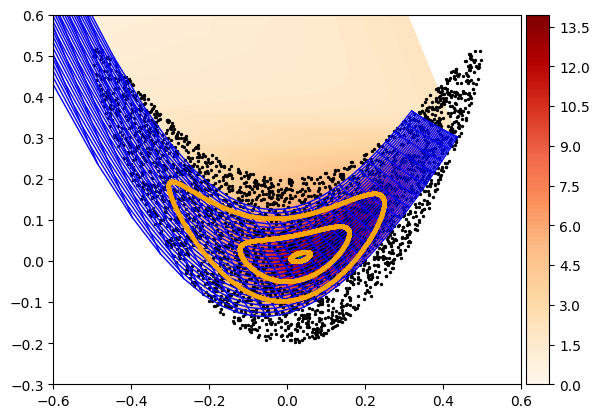

In [127]:
scale = 1.2
factor = 1.2

sampling_data = torch.tensor(np.random.normal(scale=.0, size=(10000,2)))
plot_transformed_grid_and_density(model_banana, training_set.to('cpu'), device, sampling_data, grid_width=30,
                                 x_range=(-factor, factor), y_range=(-1.5*factor, 1.5*factor), x_lim=(-0.5*scale, 0.5*scale), y_lim=(-0.25*scale, 0.5*scale),
                                 density_function=compute_gaussian_density, name='banana_gaussian_4.png')

In [256]:
sampling_data = generate_ellipse(10000, (1., 1.), device=device) 
with torch.no_grad():
    transformed = model_banana(model_circle(sampling_data), reverse=True)

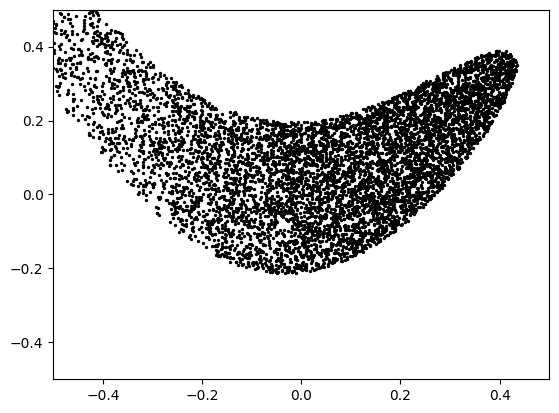

In [262]:
sampling_data = generate_ellipse(10000, (1., 1.), device=device) 
with torch.no_grad():
    transformed = model_banana(model_circle(sampling_data), reverse=True)

transformed = transformed.detach().to('cpu')

factor = 1
scale = 1

x_range=(-factor, factor)
y_range=(-factor, factor)
x_lim=(-0.5*scale,0.5*scale)
y_lim=(-0.5*scale,0.5*scale)

fig, ax = plt.subplots()

plt.xlim(*x_lim)
plt.ylim(*y_lim)

ax.scatter(transformed[:,0], transformed[:,1], c='black', alpha=1, s=2)
plt.savefig('concat_banana.png')

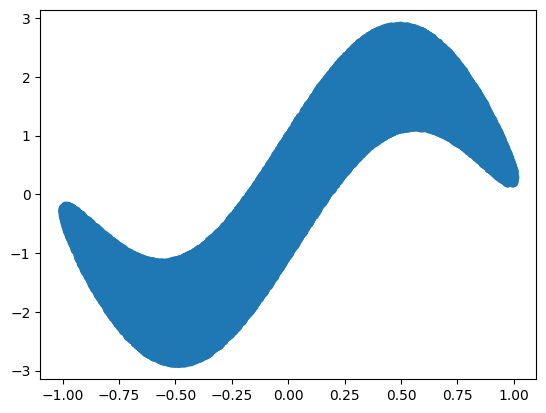

In [128]:
def generate_wave(n=100000, device='cpu'):
    train_loader = generate_ellipse(n, (1,1), device)
    train_loader[:, 1] = train_loader[:,1] + 2*torch.sin(3*train_loader[:,0])
    return train_loader
training_set = generate_wave(n=100000, device=device)
validation_set = generate_wave(n=10000, device=device)
plt.scatter(np.array(training_set.cpu())[:,0], np.array(training_set.cpu())[:,1])

# Create data loaders for our datasets; shuffle for training, not for validation
train_loader = torch.utils.data.DataLoader(training_set, batch_size=1024, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=128, shuffle=False)

In [130]:
model_wave = LUNet(num_lu_blocks=7, layer_size = 2).to(device)

In [131]:
optimizer = torch.optim.SGD(model_wave.parameters(), lr=0.1, momentum=0.8)
scheduler = StepLR(optimizer, step_size=1, gamma=0.95)
num_epochs = 50

In [142]:
%%time

for epoch in range(1, num_epochs + 1):
    training_routine_gaussian(model_wave, train_loader, optimizer)
    testing_routine(model_wave, validation_loader,loss_function=gaussian_loss_function)
    scheduler.step()

77it [00:01, 40.78it/s]
62it [00:00, 201.93it/s]


Test set: Average loss: 163.6004


77it [00:01, 48.09it/s]
62it [00:00, 194.97it/s]


Test set: Average loss: 163.4482


77it [00:01, 45.19it/s]
62it [00:00, 201.28it/s]


Test set: Average loss: 163.9665


77it [00:01, 47.04it/s]
62it [00:00, 197.45it/s]


Test set: Average loss: 163.6660


77it [00:01, 44.53it/s]
62it [00:00, 190.17it/s]


Test set: Average loss: 163.3914


77it [00:01, 44.28it/s]
62it [00:00, 199.36it/s]


Test set: Average loss: 163.9605


77it [00:01, 44.08it/s]
62it [00:00, 200.00it/s]


Test set: Average loss: 163.1808


77it [00:01, 47.65it/s]
62it [00:00, 205.28it/s]


Test set: Average loss: 163.3293


77it [00:01, 45.37it/s]
62it [00:00, 189.02it/s]


Test set: Average loss: 163.0557


77it [00:01, 43.77it/s]
62it [00:00, 195.58it/s]


Test set: Average loss: 163.6347


77it [00:01, 44.05it/s]
62it [00:00, 199.36it/s]


Test set: Average loss: 163.0289


77it [00:01, 44.38it/s]
62it [00:00, 200.00it/s]


Test set: Average loss: 163.3716


77it [00:01, 44.56it/s]
62it [00:00, 199.98it/s]


Test set: Average loss: 163.6434


77it [00:01, 44.10it/s]
62it [00:00, 192.55it/s]


Test set: Average loss: 162.8395


77it [00:01, 44.15it/s]
62it [00:00, 198.08it/s]


Test set: Average loss: 162.8417


77it [00:01, 43.95it/s]
62it [00:00, 200.63it/s]


Test set: Average loss: 162.8560


77it [00:01, 44.41it/s]
62it [00:00, 199.36it/s]


Test set: Average loss: 162.8556


77it [00:01, 43.87it/s]
62it [00:00, 196.82it/s]


Test set: Average loss: 162.8039


77it [00:01, 44.25it/s]
62it [00:00, 194.97it/s]


Test set: Average loss: 163.1927


77it [00:01, 44.38it/s]
62it [00:00, 201.28it/s]


Test set: Average loss: 162.8022


77it [00:01, 43.65it/s]
62it [00:00, 196.81it/s]


Test set: Average loss: 162.8116


77it [00:01, 44.64it/s]
62it [00:00, 198.06it/s]


Test set: Average loss: 162.6411


77it [00:01, 43.70it/s]
62it [00:00, 196.81it/s]


Test set: Average loss: 163.1524


77it [00:01, 44.05it/s]
62it [00:00, 193.75it/s]


Test set: Average loss: 162.8307


77it [00:01, 42.08it/s]
62it [00:00, 199.36it/s]


Test set: Average loss: 162.6574


77it [00:01, 44.30it/s]
62it [00:00, 201.28it/s]


Test set: Average loss: 162.5254


77it [00:01, 44.33it/s]
62it [00:00, 193.15it/s]


Test set: Average loss: 162.5561


77it [00:01, 44.77it/s]
62it [00:00, 199.36it/s]


Test set: Average loss: 162.5185


77it [00:01, 45.08it/s]
62it [00:00, 198.06it/s]


Test set: Average loss: 162.4800


77it [00:01, 43.87it/s]
62it [00:00, 191.95it/s]


Test set: Average loss: 162.5244


77it [00:01, 44.20it/s]
62it [00:00, 199.36it/s]


Test set: Average loss: 162.4859


77it [00:01, 44.00it/s]
62it [00:00, 198.70it/s]


Test set: Average loss: 162.4278


77it [00:01, 43.80it/s]
62it [00:00, 198.72it/s]


Test set: Average loss: 162.4714


77it [00:01, 44.46it/s]
62it [00:00, 198.70it/s]


Test set: Average loss: 162.5215


77it [00:01, 44.95it/s]
62it [00:00, 196.20it/s]


Test set: Average loss: 162.4552


77it [00:01, 43.77it/s]
62it [00:00, 201.28it/s]


Test set: Average loss: 162.3930


77it [00:01, 44.05it/s]
62it [00:00, 202.59it/s]


Test set: Average loss: 162.4014


77it [00:01, 43.53it/s]
62it [00:00, 191.93it/s]


Test set: Average loss: 162.3722


77it [00:01, 42.97it/s]
62it [00:00, 191.36it/s]


Test set: Average loss: 162.3559


77it [00:01, 42.59it/s]
62it [00:00, 192.53it/s]


Test set: Average loss: 162.3402


77it [00:01, 43.30it/s]
62it [00:00, 193.13it/s]


Test set: Average loss: 162.3771


77it [00:01, 43.14it/s]
62it [00:00, 193.73it/s]


Test set: Average loss: 162.3529


77it [00:01, 42.52it/s]
62it [00:00, 185.61it/s]


Test set: Average loss: 162.3519


77it [00:01, 41.24it/s]
62it [00:00, 194.36it/s]


Test set: Average loss: 162.3371


77it [00:01, 43.38it/s]
62it [00:00, 191.95it/s]


Test set: Average loss: 162.3147


77it [00:01, 43.33it/s]
62it [00:00, 193.75it/s]


Test set: Average loss: 162.3588


77it [00:01, 42.42it/s]
62it [00:00, 193.13it/s]


Test set: Average loss: 162.2847


77it [00:01, 42.97it/s]
62it [00:00, 191.36it/s]


Test set: Average loss: 162.3248


77it [00:01, 42.57it/s]
62it [00:00, 190.75it/s]


Test set: Average loss: 162.2962


77it [00:01, 42.78it/s]
62it [00:00, 189.02it/s]

Test set: Average loss: 162.2898
CPU times: total: 3min 49s
Wall time: 1min 43s


C:\Users\Admin\AppData\Local\Temp\ipykernel_28772\4193416005.py:122: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  output = model(torch.tensor(sampling_data, device=device), reverse=True)


0

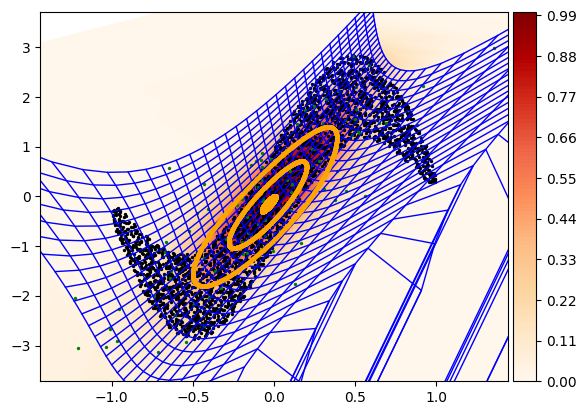

In [147]:
scale = 1.2
factor = 1.9

sampling_data = torch.tensor(np.random.normal(scale=1, size=(100,2)))
plot_transformed_grid_and_density(model_wave, training_set.to('cpu'), device, sampling_data, grid_width=30,
                                 x_range=(-factor, factor), y_range=(-1.5*factor, 1.5*factor), x_lim=(-1.2*scale, 1.2*scale), y_lim=(-3.1*scale, 3.1*scale),
                                 density_function=compute_gaussian_density, name='wave_gaussian_2.png')

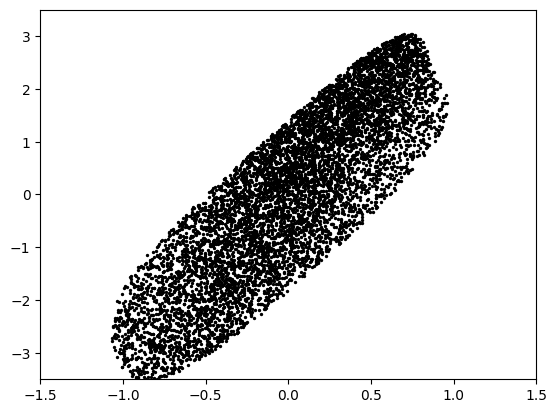

In [263]:
sampling_data = generate_ellipse(10000, (1., 1.), device=device) 
with torch.no_grad():
    transformed = model_wave(model_circle(sampling_data), reverse=True)

transformed = transformed.detach().to('cpu')

factor = 1
scale = 1

x_range=(-factor, factor)
y_range=(-factor, factor)
x_lim=(-1.5*scale,1.5*scale)
y_lim=(-3.5*scale,3.5*scale)

fig, ax = plt.subplots()

plt.xlim(*x_lim)
plt.ylim(*y_lim)

ax.scatter(transformed[:,0], transformed[:,1], c='black', alpha=1, s=2)
plt.savefig('concat_wave.png')

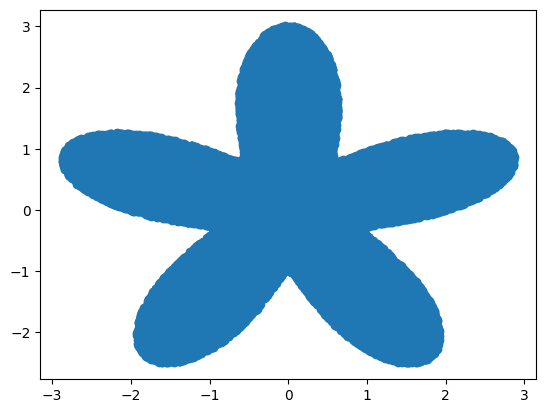

In [148]:
def generate_star(max_num = 10000, n_edges = 5, device='cpu'):
    data = generate_ellipse(max_num, scale=(3,3), device=device)
    angles = torch.arctan2(data[:,1],data[:,0])
    max_amplitude = torch.sin(n_edges*angles)+2
    amplitude = torch.sum(data**2,axis=1)**0.5
    data = data[amplitude <= max_amplitude]
    return data

training_set = generate_star(max_num=100000, n_edges=5, device=device)
validation_set = generate_star(max_num=10000, n_edges=5, device=device)
plt.scatter(np.array(training_set.cpu())[:,0], np.array(training_set.cpu())[:,1])

# Create data loaders for our datasets; shuffle for training, not for validation
train_loader = torch.utils.data.DataLoader(training_set, batch_size=1024, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=128, shuffle=False)

In [241]:
model_star = LUNet(num_lu_blocks=8, layer_size = 2).to(device)

In [242]:
optimizer = torch.optim.SGD(model_star.parameters(), lr=0.1, momentum=0.8)
scheduler = StepLR(optimizer, step_size=1, gamma=0.98)
num_epochs = 50
#init_loss_dict(num_epochs) # number of epochs

In [230]:
scheduler.get_last_lr()

[0.013261955589475296]

In [243]:
%%time

for epoch in range(1, num_epochs + 1):
    training_routine_gaussian(model_star, train_loader, optimizer)
    testing_routine(model_star, validation_loader,loss_function=gaussian_loss_function)
    scheduler.step()

39it [00:01, 34.37it/s]
31it [00:00, 165.75it/s]


Test set: Average loss: 562.7471


39it [00:00, 42.25it/s]
31it [00:00, 159.77it/s]


Test set: Average loss: 446.4027


39it [00:00, 41.80it/s]
31it [00:00, 166.67it/s]


Test set: Average loss: 391.3182


39it [00:00, 42.32it/s]
31it [00:00, 166.67it/s]


Test set: Average loss: 384.8134


39it [00:00, 42.48it/s]
31it [00:00, 158.56it/s]


Test set: Average loss: 385.8988


39it [00:00, 42.30it/s]
31it [00:00, 173.18it/s]


Test set: Average loss: 387.3229


39it [00:00, 43.05it/s]
31it [00:00, 173.18it/s]


Test set: Average loss: 365.6708


39it [00:00, 42.39it/s]
31it [00:00, 168.45it/s]


Test set: Average loss: 364.7088


39it [00:00, 42.62it/s]
31it [00:00, 173.19it/s]


Test set: Average loss: 366.7778


39it [00:00, 42.67it/s]
31it [00:00, 171.27it/s]


Test set: Average loss: 368.1210


39it [00:00, 42.76it/s]
31it [00:00, 174.16it/s]


Test set: Average loss: 355.7366


39it [00:00, 42.07it/s]
31it [00:00, 169.38it/s]


Test set: Average loss: 356.1261


39it [00:00, 42.62it/s]
31it [00:00, 170.33it/s]


Test set: Average loss: 358.1020


39it [00:00, 42.86it/s]
31it [00:00, 172.22it/s]


Test set: Average loss: 359.9795


39it [00:00, 41.45it/s]
31it [00:00, 172.22it/s]


Test set: Average loss: 349.4146


39it [00:00, 42.12it/s]
31it [00:00, 170.33it/s]


Test set: Average loss: 349.9563


39it [00:00, 42.16it/s]
31it [00:00, 171.27it/s]


Test set: Average loss: 350.4284


39it [00:00, 41.58it/s]
31it [00:00, 167.53it/s]


Test set: Average loss: 351.9348


39it [00:00, 42.05it/s]
31it [00:00, 170.33it/s]


Test set: Average loss: 345.7221


39it [00:00, 42.44it/s]
31it [00:00, 174.16it/s]


Test set: Average loss: 346.1849


39it [00:00, 42.76it/s]
31it [00:00, 173.19it/s]


Test set: Average loss: 347.6394


39it [00:00, 42.53it/s]
31it [00:00, 164.00it/s]


Test set: Average loss: 347.6755


39it [00:00, 42.74it/s]
31it [00:00, 166.55it/s]


Test set: Average loss: 342.9070


39it [00:00, 42.09it/s]
31it [00:00, 168.46it/s]


Test set: Average loss: 341.2662


39it [00:00, 42.45it/s]
31it [00:00, 170.33it/s]


Test set: Average loss: 341.7332


39it [00:00, 41.85it/s]
31it [00:00, 172.22it/s]


Test set: Average loss: 343.4095


39it [00:00, 41.75it/s]
31it [00:00, 165.75it/s]


Test set: Average loss: 343.9630


39it [00:00, 42.30it/s]
31it [00:00, 169.38it/s]


Test set: Average loss: 341.4835


39it [00:00, 41.72it/s]
31it [00:00, 166.65it/s]


Test set: Average loss: 338.6096


39it [00:00, 41.63it/s]
31it [00:00, 166.67it/s]


Test set: Average loss: 347.4001


39it [00:00, 41.49it/s]
31it [00:00, 163.58it/s]


Test set: Average loss: 340.0429


39it [00:00, 41.87it/s]
31it [00:00, 166.64it/s]


Test set: Average loss: 341.2426


39it [00:00, 42.14it/s]
31it [00:00, 168.02it/s]


Test set: Average loss: 338.8335


39it [00:00, 42.74it/s]
31it [00:00, 170.79it/s]


Test set: Average loss: 338.5301


39it [00:00, 41.94it/s]
31it [00:00, 170.33it/s]


Test set: Average loss: 338.8844


39it [00:00, 42.33it/s]
31it [00:00, 170.30it/s]


Test set: Average loss: 337.3703


39it [00:00, 42.60it/s]
31it [00:00, 171.27it/s]


Test set: Average loss: 337.0482


39it [00:00, 41.73it/s]
31it [00:00, 169.37it/s]


Test set: Average loss: 337.5381


39it [00:00, 41.68it/s]
31it [00:00, 169.40it/s]


Test set: Average loss: 337.7966


39it [00:00, 42.16it/s]
31it [00:00, 166.64it/s]


Test set: Average loss: 342.5999


39it [00:00, 42.33it/s]
31it [00:00, 169.38it/s]


Test set: Average loss: 337.5700


39it [00:00, 41.81it/s]
31it [00:00, 172.22it/s]


Test set: Average loss: 336.0438


39it [00:00, 42.38it/s]
31it [00:00, 169.37it/s]


Test set: Average loss: 335.7936


39it [00:00, 42.35it/s]
31it [00:00, 170.31it/s]


Test set: Average loss: 336.7626


39it [00:00, 42.94it/s]
31it [00:00, 170.33it/s]


Test set: Average loss: 336.2929


39it [00:01, 36.57it/s]
31it [00:00, 169.40it/s]


Test set: Average loss: 338.6154


39it [00:00, 42.05it/s]
31it [00:00, 168.46it/s]


Test set: Average loss: 340.5366


39it [00:00, 42.23it/s]
31it [00:00, 171.57it/s]


Test set: Average loss: 342.5860


39it [00:00, 42.58it/s]
31it [00:00, 170.33it/s]


Test set: Average loss: 340.0669


39it [00:00, 42.77it/s]
31it [00:00, 172.22it/s]

Test set: Average loss: 341.1452
CPU times: total: 2min 53s
Wall time: 55.9 s


C:\Users\Admin\AppData\Local\Temp\ipykernel_28772\4193416005.py:122: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  output = model(torch.tensor(sampling_data, device=device), reverse=True)


0

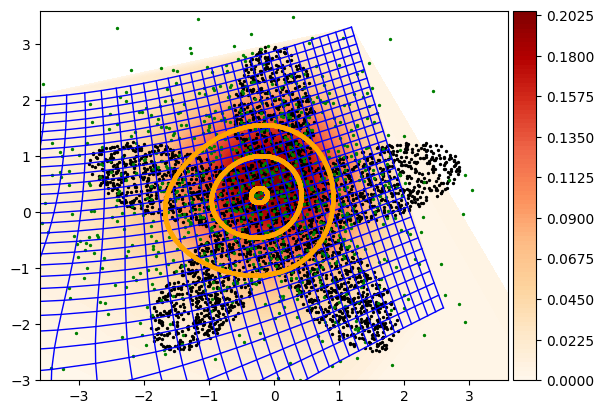

In [247]:
scale = 1.2
factor = 2.

sampling_data =  torch.tensor(np.random.normal(size=(1000,2)))
plot_transformed_grid_and_density(model_star, training_set.to('cpu'), device, sampling_data, grid_width=30,grid_shape=(1000,3),
                                 x_range=(-factor, factor), y_range=(-1*factor, 1*factor), x_lim=(-3*scale, 3*scale), y_lim=(-2.5*scale, 3*scale),
                                 density_function=compute_gaussian_density, name='star_gaussian.png')

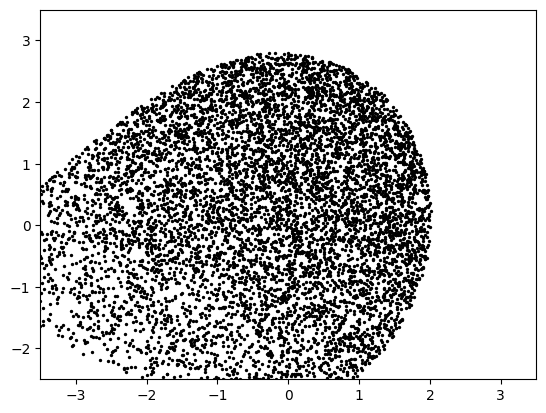

In [265]:
sampling_data = generate_ellipse(10000, (1., 1.), device=device) 
with torch.no_grad():
    transformed = model_star(model_circle(sampling_data), reverse=True)

transformed = transformed.detach().to('cpu')

factor = 1
scale = 1

x_range=(-factor, factor)
y_range=(-factor, factor)
x_lim=(-3.5*scale,3.5*scale)
y_lim=(-2.5*scale,3.5*scale)

fig, ax = plt.subplots()

plt.xlim(*x_lim)
plt.ylim(*y_lim)

ax.scatter(transformed[:,0], transformed[:,1], c='black', alpha=1, s=2)
plt.savefig('concat_star.png')